In [9]:
from glob import glob
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

spotify_color = '#5bb560'

In [4]:
log_mini_df = pd.read_csv('data/training_set/log_mini.csv')

In [8]:
log_mini_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
session_id                         167880 non-null object
session_position                   167880 non-null int64
session_length                     167880 non-null int64
track_id_clean                     167880 non-null object
skip_1                             167880 non-null bool
skip_2                             167880 non-null bool
skip_3                             167880 non-null bool
not_skipped                        167880 non-null bool
context_switch                     167880 non-null int64
no_pause_before_play               167880 non-null int64
short_pause_before_play            167880 non-null int64
long_pause_before_play             167880 non-null int64
hist_user_behavior_n_seekfwd       167880 non-null int64
hist_user_behavior_n_seekback      167880 non-null int64
hist_user_behavior_is_shuffle      167880 non-null bool
hour_of_day                        16

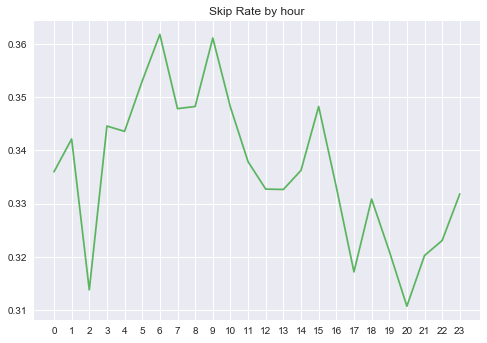

In [19]:
skip_rates = (log_mini_df.groupby('hour_of_day')['not_skipped'].sum() 
              /log_mini_df.groupby('hour_of_day')['not_skipped'].count())

plt.plot(skip_rates.index, skip_rates, color = spotify_color)
plt.title('Skip Rate by hour')
plt.xticks(skip_rates.index)


plt.show();

Number of songs played by Premium users: 136053
Number of songs played by Non-Premium users: 31827 
      


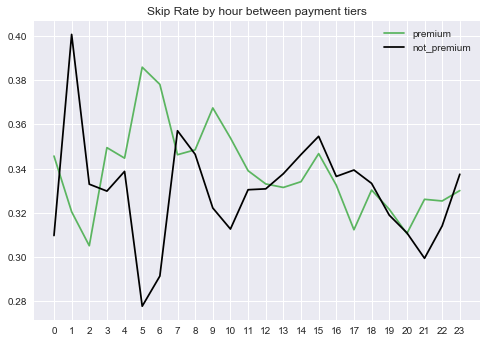

In [32]:
# is there a difference if they're premium or not

premium_mask = (log_mini_df.premium ==1)
log_mini_premium = log_mini_df[premium_mask]
log_mini_not_premium = log_mini_df[~premium_mask]

premium_skip_rates = (log_mini_premium.groupby('hour_of_day')['not_skipped'].sum() 
              /log_mini_premium.groupby('hour_of_day')['not_skipped'].count())

not_premium_skip_rates = (log_mini_not_premium.groupby('hour_of_day')['not_skipped'].sum() 
              /log_mini_not_premium.groupby('hour_of_day')['not_skipped'].count())

print(f"""Number of songs played by Premium users: {len(log_mini_premium)}
Number of songs played by Non-Premium users: {len(log_mini_not_premium)} 
      """)

plt.plot(premium_skip_rates.index, premium_skip_rates, color = spotify_color)
plt.plot(not_premium_skip_rates.index, not_premium_skip_rates, color = 'black')

plt.title('Skip Rate by hour between payment tiers')
plt.xticks(skip_rates.index)
plt.legend(labels=['premium', 'not_premium'])

plt.show();